In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/airline_prices.csv')

In [5]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.shape

(300153, 11)

### 3.1 Check Missing Values

In [7]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### 3.2 Check Duplicates

In [8]:
df.duplicated().sum()

np.int64(531)

#### Remove Duplicates

In [9]:
df=df.drop_duplicates()

In [10]:
df.duplicated().sum()

np.int64(0)

### 3.4 Check data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299622 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           299622 non-null  object 
 1   flight            299622 non-null  object 
 2   source_city       299622 non-null  object 
 3   departure_time    299622 non-null  object 
 4   stops             299622 non-null  object 
 5   arrival_time      299622 non-null  object 
 6   destination_city  299622 non-null  object 
 7   class             299622 non-null  object 
 8   duration          299622 non-null  float64
 9   days_left         299622 non-null  int64  
 10  price             299622 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.4+ MB


#### 3.4 Checking the number of unique values of each column

In [12]:
df.nunique()

airline                 6
flight                939
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

### 3.5 Check statistics of data set

In [13]:
df.describe()

,duration,days_left,price
count,299622.000000,299622.000000,299622.000000
mean,12.236543,25.997951,20919.793640
std,7.188274,13.560089,22706.397017
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4789.000000
50%,11.250000,26.000000,7426.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


### Insights
- 1. Count: All three columns have the same number of non-null values (299622), indicating that there are no missing values in the dataset.

- 2. Mean and Median:
   - duration: The average duration is 12.24 days, while the median is 11.25 days. This suggests that the data is slightly skewed to the right, with a few larger values pulling the mean up.
   - days_left: The average days left is 25.99 days, and the median is 26 days. This indicates a relatively symmetrical distribution for days_left.
   - price: The average price is 20919.79 units (the exact currency is not provided), and the median is 7426 units. This shows a significant right-skewness in the price distribution, with a few very high-priced items pulling the mean up.

- 3. Standard Deviation (std):

   - duration: The standard deviation is 7.19 days, indicating that the durations are relatively spread out around the mean.
   - days_left: The standard deviation is 13.56 days, suggesting a moderate spread in the days left.
   - price: The standard deviation is 22706.39 units, confirming the high degree of variability in the prices.

- 4. Minimum and Maximum:

   - duration: The minimum duration is 0.83 days, while the maximum is 49.83 days.
   - days_left: The minimum days left is 1 day, and the maximum is 49 days.
   - price: The minimum price is 1105 units, and the maximum is 123071 units.
- 5. Percentiles (25%, 50%, 75%):

   - duration: 25% of the durations are less than or equal to 6.83 days, 50% are less than or equal to 11.25 days, and 75% are less than or equal to 16.17 days.
   - days_left: 25% of the days left are less than or equal to 15 days, 50% are less than or equal to 26 days, and 75% are less than or equal to 38 days.
   - price: 25% of the prices are less than or equal to 4789 units, 50% are less than or equal to 7426 units, and 75% are less than or equal to 42521 units.
   
Overall, the dataset shows a wide range of values for all three variables, with a particular focus on the right-skewness of the price distribution. Further analysis could explore the relationships between these variables to gain a deeper understanding of the underlying data.

### 3.7 Exploring Data

In [14]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [15]:
print("Categories in 'airline' variable:  ",end=" " )
print(df['airline'].unique())

print("Categories in 'source_city' variable:  ",end=" " )
print(df['source_city'].unique())

print("Categories in 'departure_time' variable:  ",end=" " )
print(df['departure_time'].unique())

print("Categories in 'stops' variable:  ",end=" " )
print(df['stops'].unique())

print("Categories in 'arrival_time' variable:  ",end=" " )
print(df['arrival_time'].unique())

print("Categories in 'destination_city' variable:  ",end=" " )
print(df['destination_city'].unique())

print("Categories in 'class' variable:  ",end=" " )
print(df['class'].unique())

Categories in 'airline' variable:   ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Categories in 'source_city' variable:   ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Categories in 'departure_time' variable:   ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Categories in 'stops' variable:   ['zero' 'one' 'two_or_more']
Categories in 'arrival_time' variable:   ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
Categories in 'destination_city' variable:   ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Categories in 'class' variable:   ['Economy' 'Business']


In [16]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

for feature in df.columns:
    print(df[feature].dtype)


# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

object
object
object
object
object
object
object
object
float64
int64
int64
We have 3 numerical features : ['duration', 'days_left', 'price']

We have 8 categorical features : ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [17]:
df.head(15)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

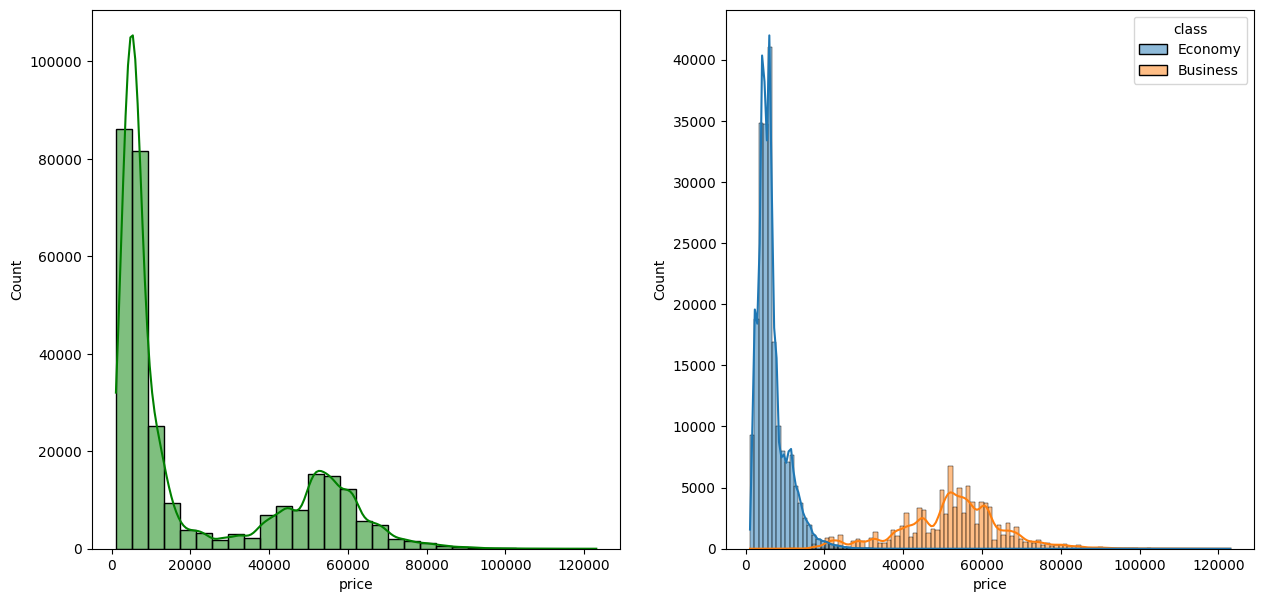

In [18]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='price',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='price',kde=True,hue='class')
plt.show()

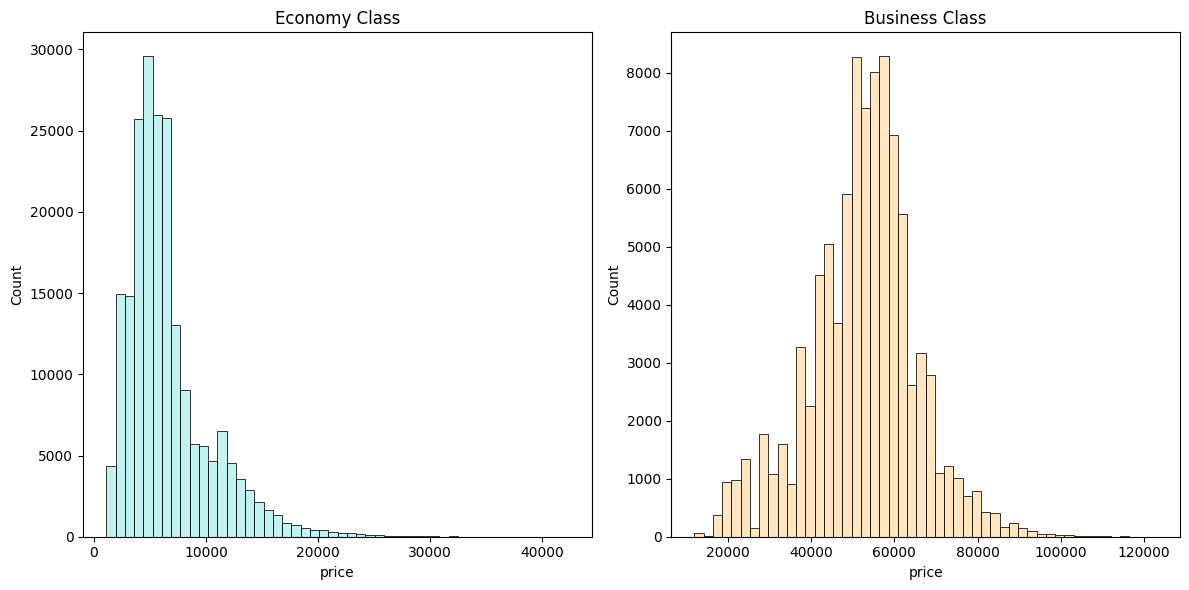

In [19]:
economy_df = df[df['class'] == 'Economy']
business_df = df[df['class'] == 'Business']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histograms
plt.subplot(121)
sns.histplot(economy_df['price'], bins=50, color='paleturquoise', ax=axs[0])
axs[0].set_title('Economy Class')

plt.subplot(122)
sns.histplot(business_df['price'], bins=50, color='navajowhite', ax=axs[1])
axs[1].set_title('Business Class')

plt.tight_layout()
plt.show()

#####  Insights
- Maximum number of flights ticket prices are less than INR 20,000(approximately USD 240 or EUR 220).
- Most economy class flight tickets are priced below INR 20,000 (approximately USD 240 or EUR 220), with a significant majority falling within the range of INR 5,000 to INR 10,000 (approximately USD 60-120 or EUR 55-110).
- Most business class flight tickets are priced below INR 90,000 (approximately USD 1,080 or EUR 990), with a significant majority falling within the range of INR 45,000 to INR 65,000 (approximately USD 540-780 or EUR 495-715).

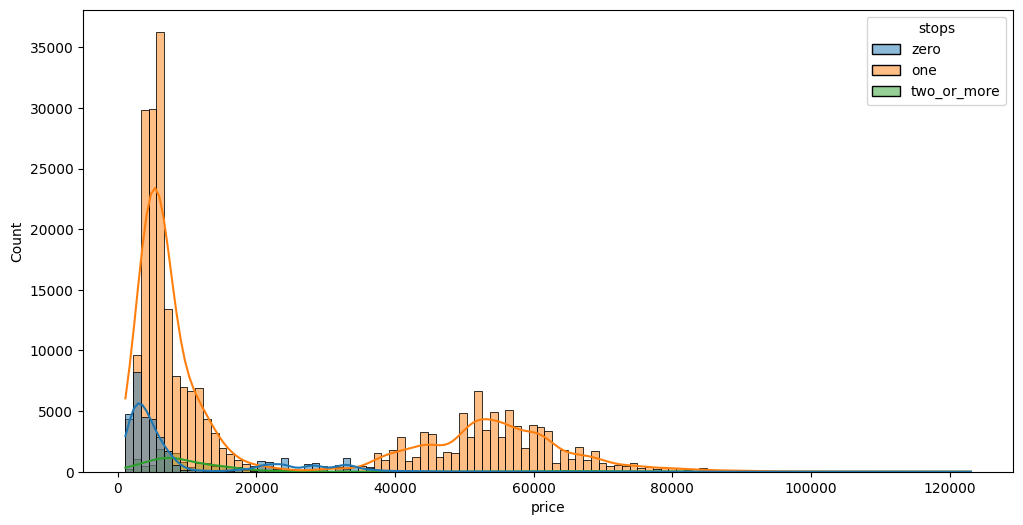

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='price',  hue='stops' , kde=True)

plt.show()

##### Insights
- Stop-Specific Distributions:
  - zero: The distribution for the "zero" stop category is centered around a lower price range, with a relatively narrow spread. This suggests that flights in this category are generally priced lower and have a more consistent pricing pattern.
  - one: The distribution for the "one" stop category is also skewed to the right but to a lesser extent than the overall distribution. This indicates that flights in this category have a wider range of prices, with some higher-priced flights pulling the distribution to the right.
  - two or more: The distribution for the "two or more" stop category is also skewed to the right a little, with a long tail extending to very high prices. This suggests that flights in this category have few extremely expensive flights.

Overll, the general trends suggest that the "zero" stop category tends to have lower prices, while the "one" and "two or more" stop category tends to have higher prices compared to "zero" stop category.

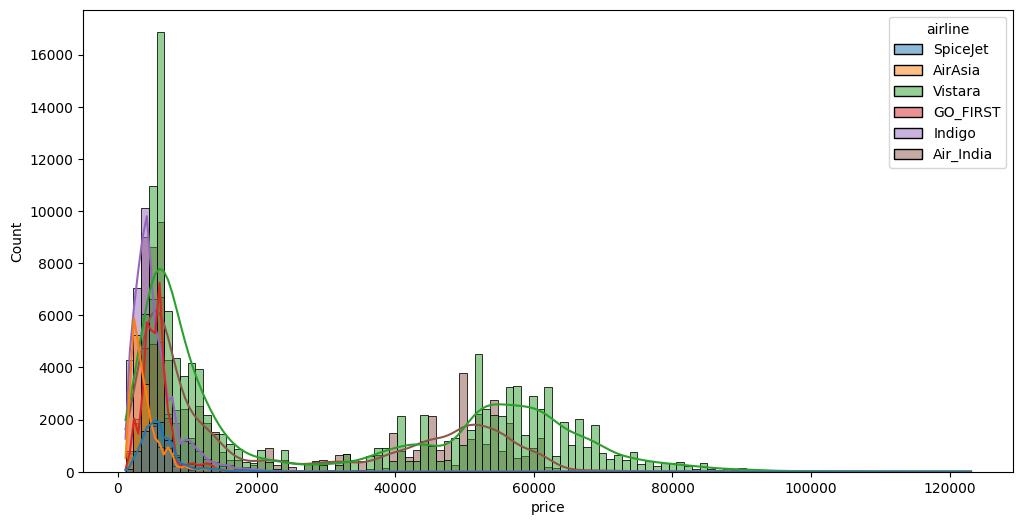

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='price',  hue='airline' , kde=True)

plt.show()

##### Insights
- SpiceJet, AirAsia, GO First, and IndiGo primarily operate with ticket prices under INR 20,000 (approximately USD 240 or EUR 220).
- Vistara and Air India offer a broader price range, with fares reaching up to INR 85,000 (approximately USD 1,020 or EUR 935), with Vistara having some of the highest ticket prices among them.

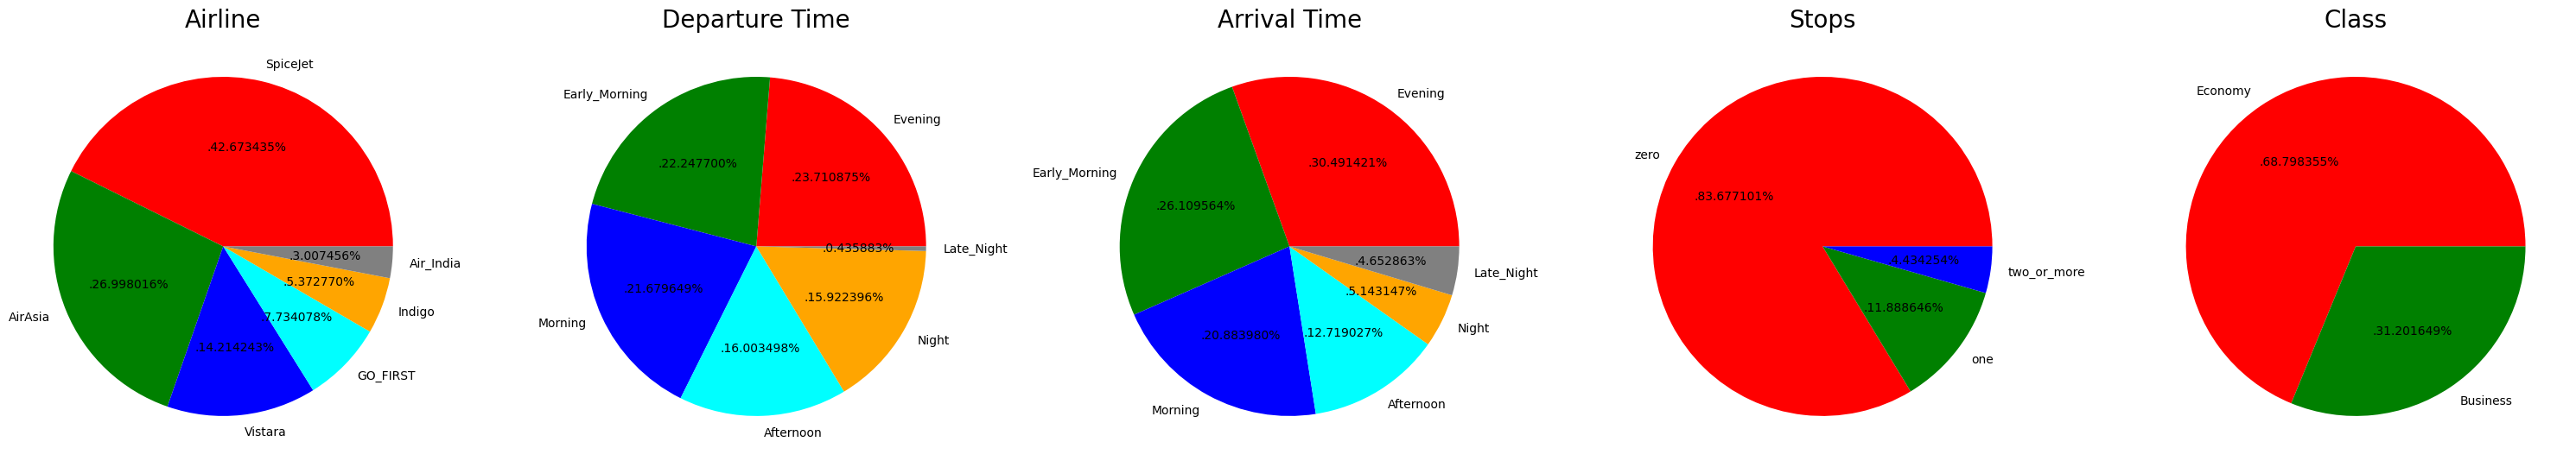

In [22]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['airline'].value_counts()
labels = 'SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo', 'Air_India'
color = ['red', 'green', 'blue', 'cyan','orange','grey']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Airline', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['departure_time'].value_counts()
labels = 'Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night', 'Late_Night'
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Departure Time', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['arrival_time'].value_counts()
labels = 'Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night', 'Late_Night'
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Arrival Time', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['stops'].value_counts()
labels = 'zero', 'one', 'two_or_more'
color = ['red', 'green', 'blue']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Stops', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['class'].value_counts()
labels = 'Economy','Business'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Class', fontsize = 20)
plt.axis('off')



plt.tight_layout()
plt.grid()

plt.show()

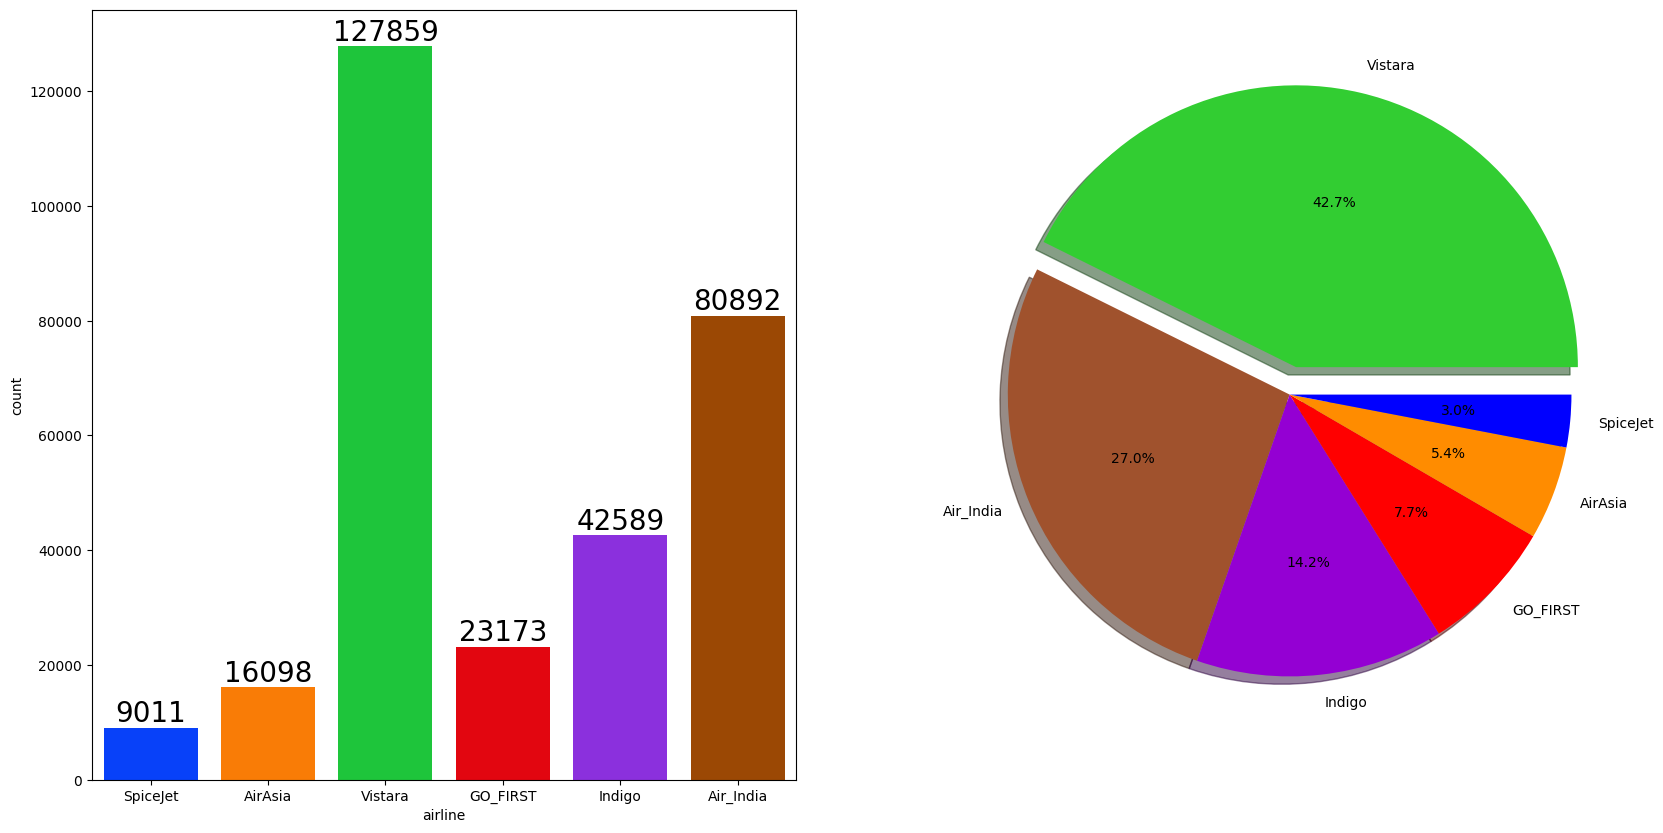

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['airline'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    axs[0].set_ylabel('Number of Flights')
    ax[0].bar_label(container,color='black',size=20)
    
    
plt.pie(x=df['airline'].value_counts(),labels=df['airline'].value_counts().index,explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',shadow=True,colors=['limegreen','sienna','darkviolet','red','darkorange','b'])
plt.show()

##### Insights
1. Airline Popularity:
- Vistara is the most popular airline with the highest number of flights (127,859), followed by AirAsia (80,892) and Indigo (23,173).
2. Market Share Based on Flight Frequency:
- Vistara dominates the market with a share of 42.7%, followed by Air India at 27.0%. Indigo has a market share of 14.2%.
3. Less Popular Airlines:
- Go First and AirAsia have relatively offer fewer flights,, with 7.7% and 5.4%, respectively. SpiceJet has the lowest flight frequency at 3.4%.

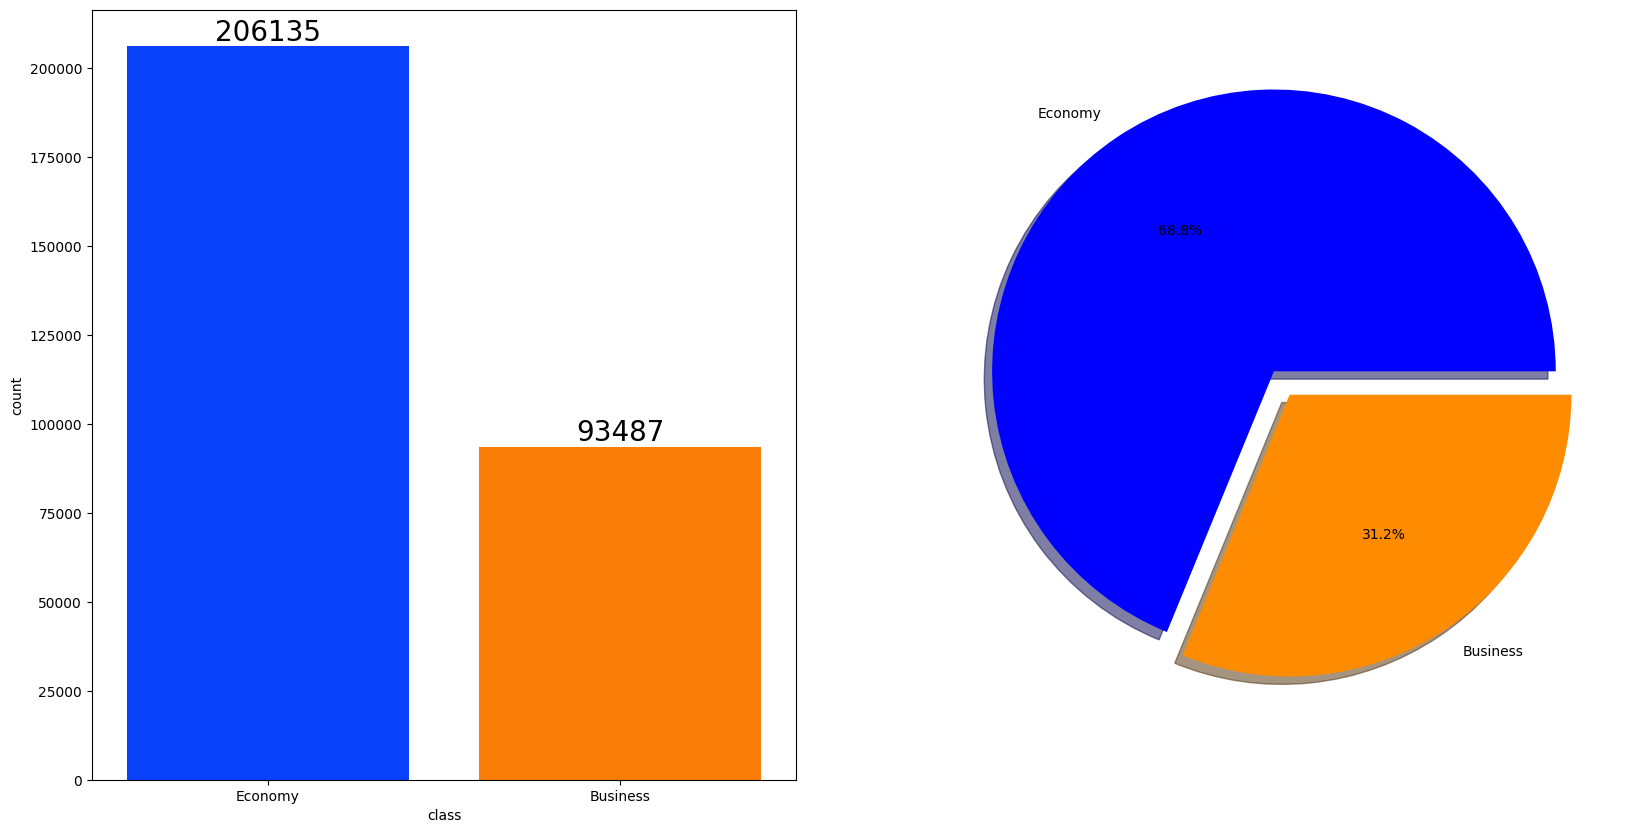

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['class'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    axs[0].set_ylabel('Number of Flights')
    ax[0].bar_label(container,color='black',size=20)
    
    
plt.pie(x=df['class'].value_counts(),labels=df['class'].value_counts().index,explode=[0.1,0],autopct='%1.1f%%',shadow=True,colors=['blue','darkorange'])
plt.show()

##### Insights 
1. Passenger Distribution:
- Economy Class is significantly more popular than Business Class, with 206,135 passengers compared to 93,487.
2. Class Composition:
- Economy Class accounts for 68.8% of total passengers, while Business Class represents 31.2%. This indicates a strong preference for Economy Class travel.

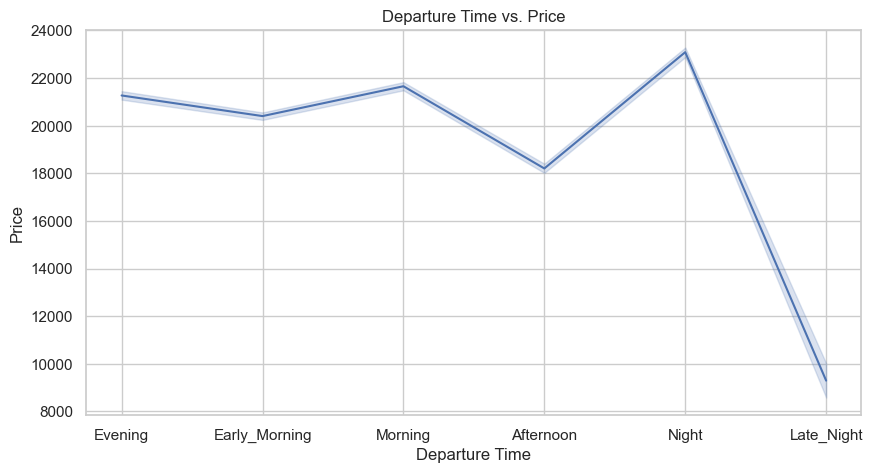

In [25]:

sns.set_theme(style="whitegrid", )
plt.subplots(figsize=(10, 5))
p = sns.lineplot(data=df,x='departure_time',y='price')
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Departure Time vs. Price")
plt.xlabel("Departure Time")
plt.ylabel("Price")
plt.show()

##### Insights
Departure Time impact on flight prices:
- Night flights tend to have the highest prices, followed by Morning flights.
- Late Night flights generally have lowest prices followed by afternoon flights.
- Early Morning and Evening flights show moderate prices.

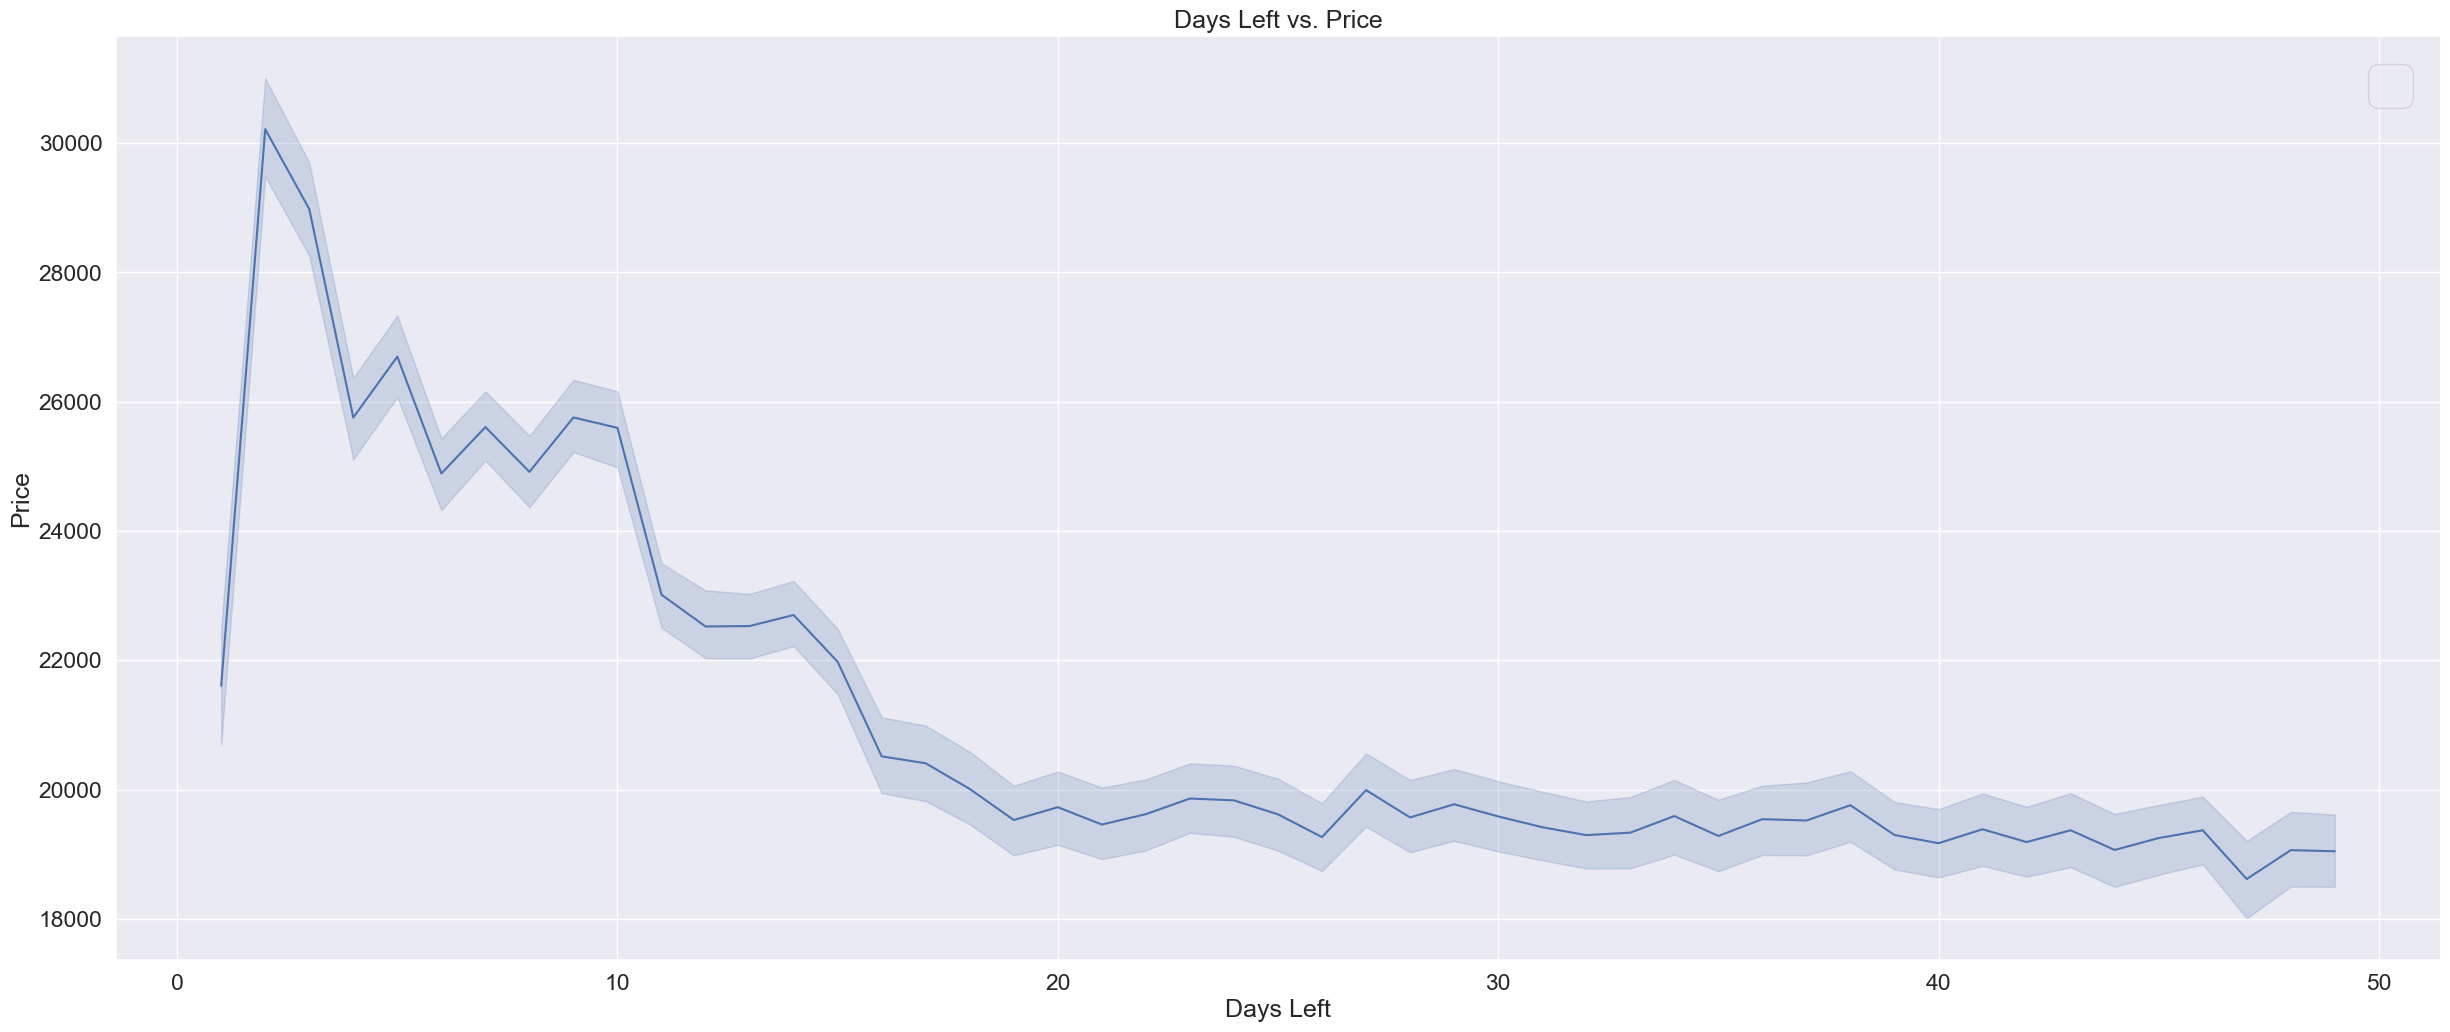

In [26]:
sns.set_theme(font_scale=1.5) 
sns.lineplot(data=df, x='days_left', y='price')

plt.title('Days Left vs. Price')
plt.xlabel('Days Left')
plt.ylabel('Price')

# Make the legend larger
plt.legend(fontsize=40)  # Adjust the fontsize as needed

plt.show()

##### Insights
- The overall trend indicates a general decrease in prices as the number of days before departure increases. This suggests that prices tend to be higher when there are fewer days remaining until the flight.
- Therefore, the number of days left until departure is a crucial factor influencing ticket prices.

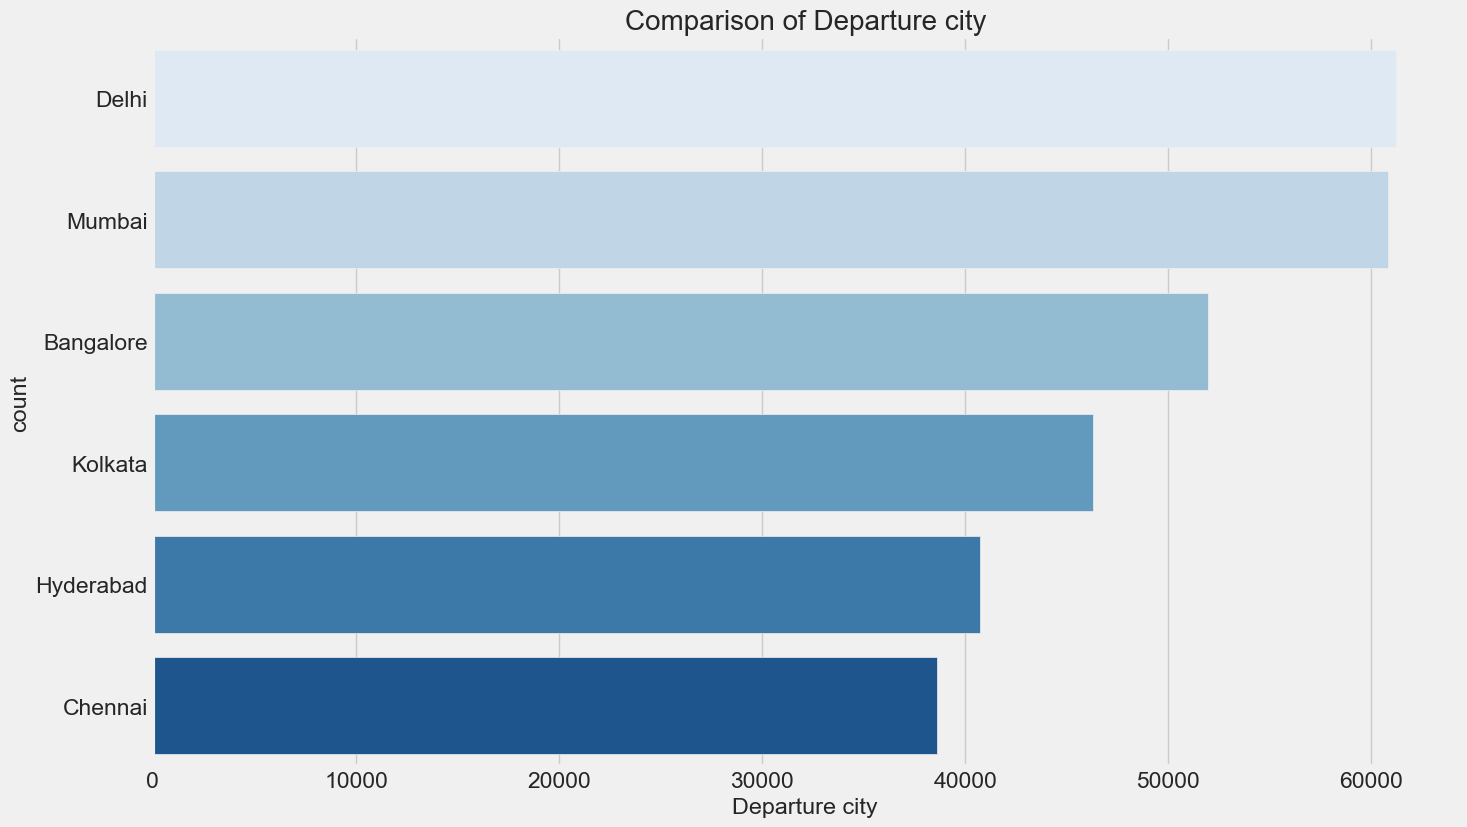

In [27]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['source_city'], palette = 'Blues')
plt.title('Comparison of Departure city', fontweight = 30, fontsize = 20)
plt.xlabel('Departure city')
plt.ylabel('count')
plt.show()

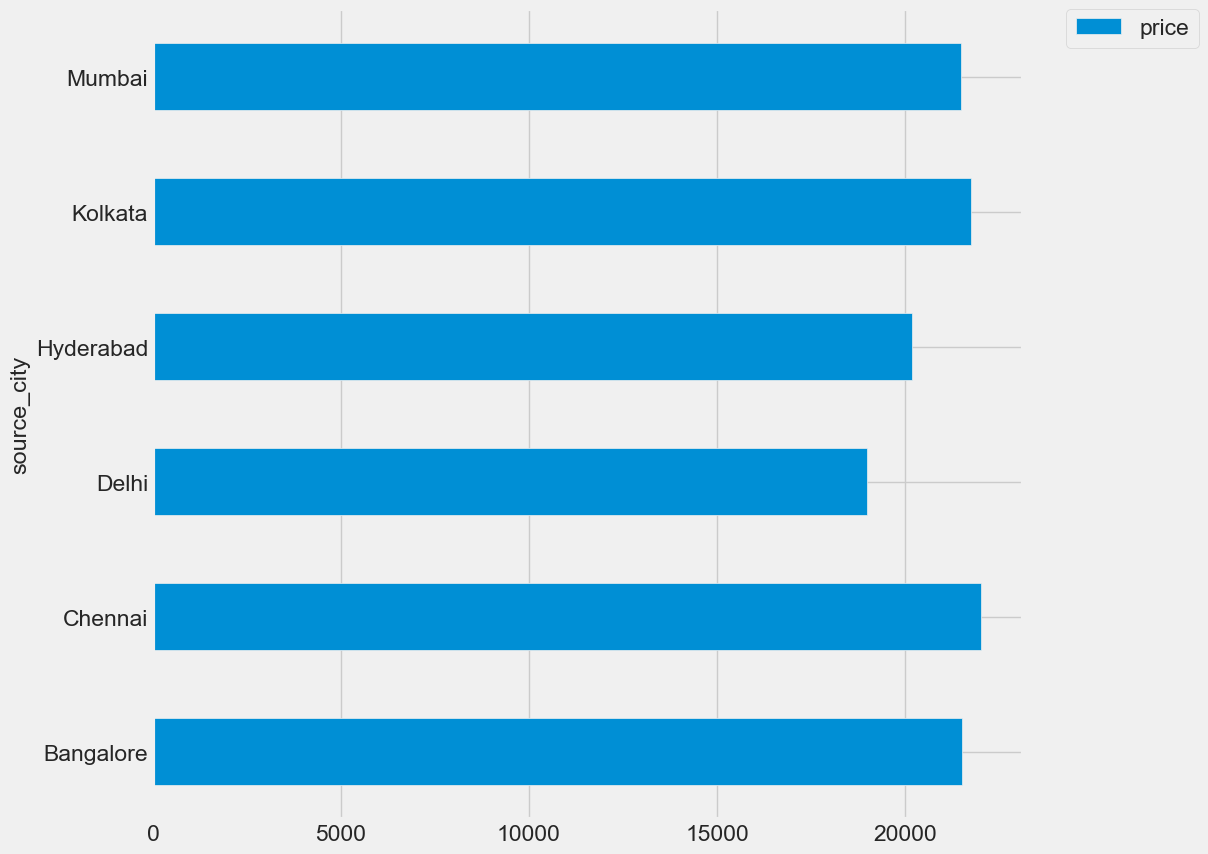

In [28]:

source_city_group = df.set_index('source_city').groupby(level=0)[['price']].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### Insights 
1. Average Ticket Prices:
- Chennai and kolkata has the highest average ticket prices, followed by bangalore and mumbai.
- Hyderabad, and Delhi have relatively lower average ticket prices.

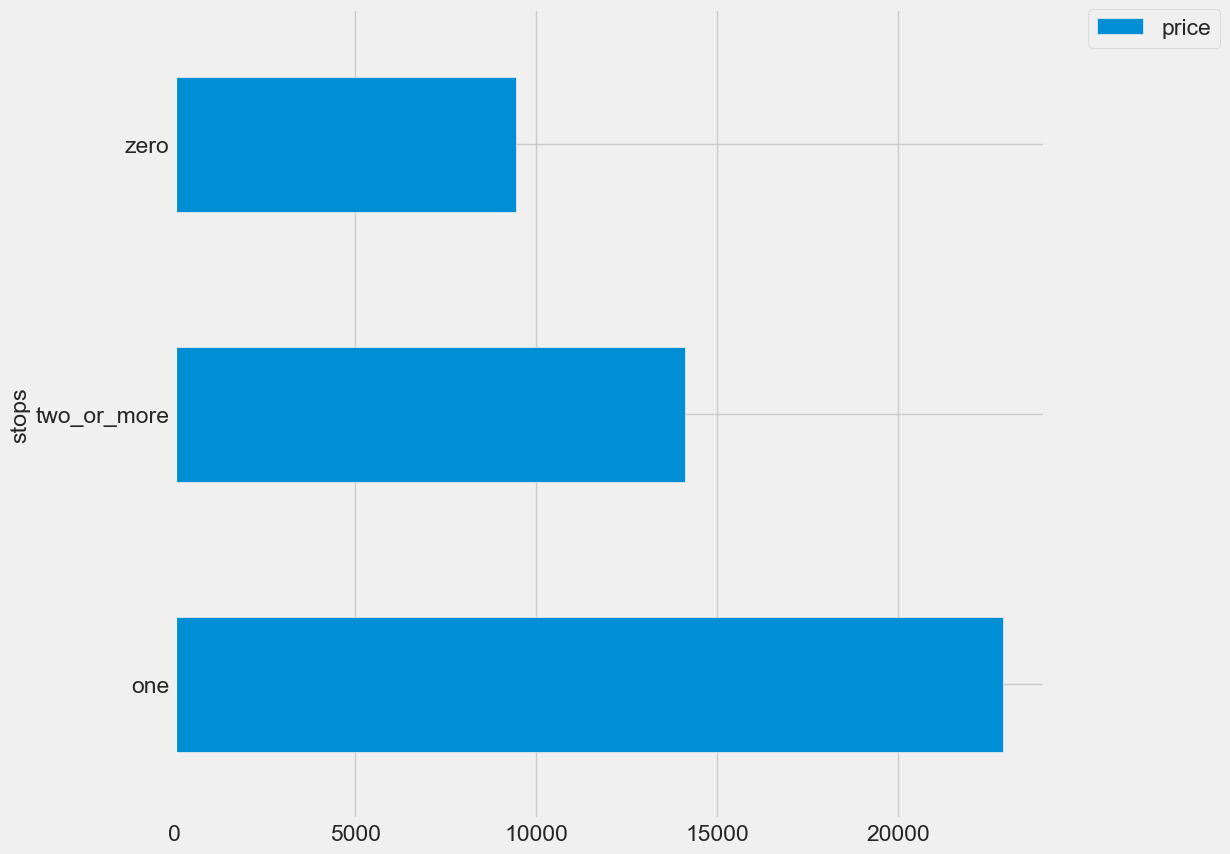

In [29]:
source_city_group = df.set_index('stops').groupby(level=0)[['price']].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### Insights
1. Pricing Trend:
- One-stop flights generally have the highest average prices, followed by two or more stops.
- Zero-stop flights tend to have the lowest prices.